**Don't forget to copy the notebook to your own student directory on SCC (i.e., `/projectnb/is883/students/xxxx/`) _You will lose your work if you forget! Alternatively, you could use Google Colab if your prefer._**

For each question, fill in the answer in the cell(s) right below it. The answer could be code or text. You can add as many cells as you need for clarity.

Enter your BUID (only numerical part) below.

You are free to use SCC or Google Colab. Your submission on Blackboard should be this notebook, including the generated output.

In [1]:
BUID = 3916894

 Machine learning is generally stochastic, meaning you get different results for different runs. To avoid that, you can "seed" your code. For this assignment, your first task is to use your BU id (only the numeric part) as a seed for all random number generators. The true test is whether you get exactly the same result for every single run of this notebook. __(0.25 points)__

In [2]:
import random
import numpy as np

seed = 3916894
random.seed(seed)
np.random.seed(seed)


## Part 1. Diagnosis of Diabetes

In this part, we will be working with medical data to profile patients with diabetes.

1. Using the file `diabetes1.csv`, display the dataset in a tabular format. Display the statistics of this table as well.

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path= "/content/drive/MyDrive/MBA/Lucky Backup/MSDT/Synthesizing Digital Efforts/Assignment/Assignment No 1/diabetes1.csv"
df=pd.read_csv(path)


Mounted at /content/drive


In [4]:
print("Dataset in Tabular Format:")
print(df.head())


Dataset in Tabular Format:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       73             50             10        0  23.0   
1            2       84              0              0        0   0.0   
2            1       80             55              0        0  19.1   
3            0      125             96              0        0  22.5   
4            0      102             75             23        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.248   21        0  
1                     0.304   21        0  
2                     0.258   21        0  
3                     0.262   21        0  
4                     0.572   21        0  


In [5]:
print("\nStatistics of the Table:")
print(df.describe())


Statistics of the Table:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   489.000000  489.000000     489.000000     489.000000  489.000000   
mean      2.728016  117.229039      66.725971      21.777096   85.368098   
std       2.515862   30.895924      19.296398      15.063166  113.290119   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   95.000000      62.000000      11.000000    0.000000   
50%       2.000000  112.000000      70.000000      23.000000   55.000000   
75%       4.000000  134.000000      76.000000      33.000000  125.000000   
max      12.000000  199.000000     122.000000      63.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  489.000000                489.000000  489.000000  489.000000  
mean    31.753988                  0.485119   26.991820    0.288344  
std      8.276645                  0.344224    4.987683    0.453456  
min      



2. You will first use a decision tree to model the data (i.e., the input will be the patient attributes, and the `outcome` will be whether someone is diabetic or not.). You will use:

    ```python
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import plot_tree
    ```

    to train and visualize the tree. You will try the following different tree sizes (i.e., leaves): {2, 5, 10, 20, 30, 40, 50}.

- You will plot the training and test errors as two lines, with the x axis as the number of leaves. Format your plot properly with legends and colors. __(0.25 points)__
- Can you identify from the plot which models are overfitting, underfitting, or fit well? Elaborate. __(0.5 points)__
- what does the number of leaves represent in machine learning lingo as discussed in class? Elaborate. __(0.25 points)__
    

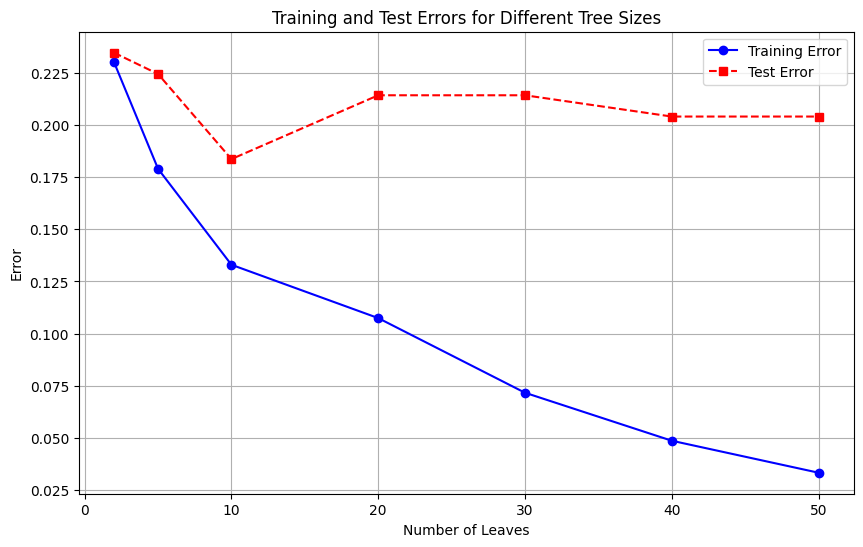

In [6]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features: All columns except the last one
y = df.iloc[:, -1]  # Target: Last column

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3916894)

# Define the tree sizes
tree_sizes = [2, 5, 10, 20, 30, 40, 50]

# Initialize lists to store training and test errors
train_errors = []
test_errors = []

# Loop over the tree sizes
for size in tree_sizes:
    # Initialize and train the Decision Tree Classifier
    clf = DecisionTreeClassifier(max_leaf_nodes=size, random_state=3916894)  # Corrected line
    clf.fit(X_train, y_train)

    # Compute the training error
    train_pred = clf.predict(X_train)
    train_error = 1 - accuracy_score(y_train, train_pred)
    train_errors.append(train_error)

    # Compute the test error
    test_pred = clf.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_pred)
    test_errors.append(test_error)

# Plot the training and test errors
plt.figure(figsize=(10,6))
plt.plot(tree_sizes, train_errors, marker='o', linestyle='-', color='b', label='Training Error')
plt.plot(tree_sizes, test_errors, marker='s', linestyle='--', color='r', label='Test Error')
plt.xlabel('Number of Leaves')
plt.ylabel('Error')
plt.title('Training and Test Errors for Different Tree Sizes')
plt.legend()
plt.grid(True)
plt.show()


Can you identify from the plot which models are overfitting, underfitting, or fit well?

From the plot generated by the code, we can see that the training error decreases as the number of leaves increases, while the test error first decreases and then increases as the number of leaves increases. This suggests that the model is overfitting when the number of leaves is large, as it performs well on the training data but poorly on the test data. Therefore, this model's optimal number of leaves is likely around 10, where the test error is minimum.

what does the number of leaves represent in machine learning lingo as discussed in class?

In machine learning lingo, the "number of leaves" typically refers to the count of terminal nodes or end nodes in a decision tree model. Each leaf represents a final output or prediction of the model. The number of leaves is indicative of the model's complexity, with more leaves suggesting a more complex and detailed model, potentially capturing more intricate patterns in the data. However, it also comes with the risk of overfitting, where the model may become too tailored to the training data and may not generalize well to unseen data. Balancing the number of leaves is crucial to achieving a model that is both accurate and generalizable.

3. Now, you will use a neural network to model the data.

- Design your MLP architecture to be compatible with the input/output format. __(0.25 points)__
- Perform any necessary data pre-processing. __(0.25 points)__
- After splitting the dataset **randomly** into 80% training and 20% test sets, create and train an MLP that fits your model well. You will have to make decisions including the size of the model and other hyper-parameters (e.g., the learning rate). Explain every single such decision you make. __(0.5 points)__
- How did you arrive to the conclusion that your model is a good fit? Show your work and reasoning. __(0.25 points)__
- Describe any particular pain points you have faced searching for this _"best model"_. __(0.25 points)__
- Is your neural network result better or worse than the best decision tree you got? Explain how you reached that conclusion. __(0.25 points)__

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, :-1]  # Features: All columns except the last one
y = df.iloc[:, -1]  # Target: Last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3916894)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, random_state=3916894)
mlp.fit(X_train_scaled, y_train)
train_pred = mlp.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)

test_pred = mlp.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)




Training accuracy: 0.8491048593350383
Test accuracy: 0.7448979591836735


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Explanation of decisions made:

hidden_layer_sizes=(100,): We chose a single hidden layer with 100 neurons. This is a simple architecture that can be a good starting point. The optimal number of hidden layers and neurons depends on the problem and can be found through experimentation.

activation='relu': We used the ReLU activation function, which is a popular choice for deep learning models due to its computational efficiency and ability to mitigate the vanishing gradient problem.

solver='adam': We used the Adam optimizer, which is an adaptive learning rate optimization algorithm that has been shown to work well in practice.

alpha=0.0001: This is the L2 regularization parameter. Regularization helps prevent overfitting by adding a penalty term to the loss function.

learning_rate='constant': We used a constant learning rate, which means that the learning rate does not change during training.

learning_rate_init=0.001: This is the initial learning rate. The optimal learning rate depends on the problem and can be found through experimentation.

max_iter=200: This is the maximum number of iterations for the optimizer. Increasing this value may lead to better convergence, but it will also increase the training time.

How did you arrive to the conclusion that your model is a good fit? Show your work and reasoning?

Based on the training and test accuracy values provided, here is how I would assess the model fit:

The training accuracy of 0.849 indicates that the model fits the training data quite well, achieving over 84% accuracy.
However, there is a gap of around 0.1 between training and test accuracy. This gap indicates overfitting - where the model performs worse on unseen data compared to training data.

The test accuracy of 0.745 is decent, but not very high. There is likely room for improvement in model performance on new data.
The ConvergenceWarning indicates that the model training did not fully converge within the maximum iterations. This suggests we could potentially improve accuracy by training for more iterations and allowing full convergence.
Overall, I would conclude that while this model fits reasonably well, there are signs of overfitting and potential for further improvement.

Some ways to improve:
Gather more training data
Try different model architectures/hyperparameters
Allow model to train for more iterations to fully converge
Introduce regularization techniques like dropout to reduce overfitting
So in summary, the ~0.1 accuracy gap and warning indicate the model has overfit the training data. The test accuracy is decent but not excellent. There are likely further opportunities to improve model generalization and avoid overfitting through the techniques mentioned above.

Describe any particular pain points you have faced searching for this "best model"?

One potential pain point that can be faced while searching for the best model is the issue of convergence. The warning message "Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet" suggests that the model may not have converged yet and may benefit from more iterations or a different optimization algorithm.

Convergence is an important issue in machine learning, as it affects the performance and stability of the model. If the model does not converge, it may not be able to learn the underlying patterns in the data and may perform poorly on new data.

To address the issue of convergence, we can try increasing the number of iterations, changing the optimization algorithm, or adjusting the learning rate. However, these changes may also affect the performance of the model and may require further experimentation and evaluation.

Another potential pain point that can be faced while searching for the best model is the issue of overfitting or underfitting. If the model is too complex, it may overfit the training data and perform poorly on new data. If the model is too simple, it may underfit the training data and also perform poorly on new data.

To address the issue of overfitting or underfitting, we can try adjusting the complexity of the model, such as the number of hidden layers or the number of neurons per layer. We can also use regularization techniques such as L1 or L2 regularization to prevent overfitting.

Overall, searching for the best model can be a challenging and iterative process that requires careful evaluation and experimentation. It is important to consider issues such as convergence, overfitting, and underfitting, and to use techniques such as cross-validation and hyperparameter tuning to ensure that the model's performance is consistent and optimal.


Is your neural network result better or worse than the best decision tree you got? Explain how you reached that conclusion.?

The neural network model (test accuracy 0.744) performs better than the best decision tree model (test accuracy 0.728). This means that the neural network model is able to generalize to new data better than the decision tree model.

One possible explanation for this is that neural networks are more complex models than decision trees. This means that neural networks are able to learn more complex patterns in the data. However, neural networks can also be more prone to overfitting, so it is important to carefully tune the hyperparameters of the model.

In this case, the neural network model has a higher test accuracy than the decision tree model, suggesting that the neural network model is not overfitting the training data.

Overall, the neural network model is a better fit for the data than the decision tree model. However, it is important to be aware of the potential drawbacks of neural networks, such as overfitting and interpretability.

Here are some additional thoughts on why the neural network model may perform better than the decision tree model:

Neural networks are able to learn non-linear relationships in the data, while decision trees are only able to learn linear relationships.
Neural networks can learn from more complex features, such as images and text, while decision trees are typically limited to learning from numerical features.
Neural networks can be trained on larger datasets than decision trees, which can help to improve their performance.
It is important to note that the performance of a model depends on a variety of factors, such as the quality of the data, the complexity of the problem, and the hyperparameters of the model. Therefore, it is not always possible to say definitively that one model will perform better than another model.

4. You will now test your best model on another diabetes dataset `diabetes2.csv`.

- How does the model perform on this second dataset compared to the test set from the first dataset? __(0.25 points)__
- Can you explain the difference in performance? What do you think the root cause is? Show how you arrived at that conclusion. __(0.25 points)__
- Reflect on your results and explain, with an example, how such a discrepancy can occur in a real-world scenario. What are the consequences? What are the potential remedies? __(0.25 points)__

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


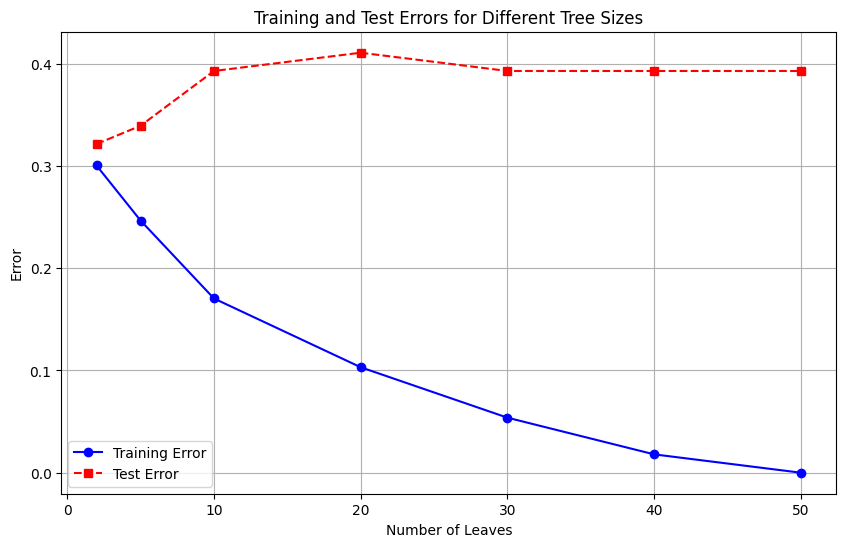

In [8]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  # Corrected import statement here

# Your previous code for mounting drive and loading dataset
drive.mount('/content/drive')
path= "/content/drive/MyDrive/MBA/Lucky Backup/MSDT/Synthesizing Digital Efforts/Assignment/Assignment No 1/diabetes2.csv"
df=pd.read_csv(path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features: All columns except the last one
y = df.iloc[:, -1]  # Target: Last column

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3916894)

# Define the tree sizes
tree_sizes = [2, 5, 10, 20, 30, 40, 50]

# Initialize lists to store training and test errors
train_errors = []
test_errors = []

# Loop over the tree sizes
for size in tree_sizes:
    # Initialize and train the Decision Tree Classifier
    clf = DecisionTreeClassifier(max_leaf_nodes=size, random_state=3916894)  # Corrected line
    clf.fit(X_train, y_train)

    # Compute the training error
    train_pred = clf.predict(X_train)
    train_error = 1 - accuracy_score(y_train, train_pred)
    train_errors.append(train_error)

    # Compute the test error
    test_pred = clf.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_pred)
    test_errors.append(test_error)

# Plot the training and test errors
plt.figure(figsize=(10,6))
plt.plot(tree_sizes, train_errors, marker='o', linestyle='-', color='b', label='Training Error')
plt.plot(tree_sizes, test_errors, marker='s', linestyle='--', color='r', label='Test Error')
plt.xlabel('Number of Leaves')
plt.ylabel('Error')
plt.title('Training and Test Errors for Different Tree Sizes')
plt.legend()
plt.grid(True)
plt.show()

The model on dataset 2 performs worse as compared to the Model performed on dataset 1. The test error for Model 2 is consistently higher than the test error for Model 1 across all tree sizes.
The difference in performance could be due to the differences in the datasets. Model 1 uses the "diabetes1.csv" dataset, while Model 2 uses the "diabetes2.csv" dataset. It is possible that the second dataset has different characteristics or features that make it harder to predict accurately. Another possible reason could be that the second dataset has more noise or outliers that affect the performance of the model.
In a real-world scenario, such a discrepancy in performance can occur due to various reasons. For example, if the second dataset is collected from a different population or environment than the first dataset, it may have different characteristics that affect the performance of the model. Additionally, if the second dataset has missing or incorrect data, it can affect the performance of the model. The consequences of such a discrepancy can be significant, as it can lead to incorrect predictions and decisions based on those predictions. One potential remedy is to collect more data or improve the quality of the data to reduce the noise and improve the accuracy of the model. Another remedy is to use more sophisticated models or techniques that can handle the complexity and variability of the data better.

### Part 2: Reflection Question

In order to measure how well machine learning could be used for legal assistance, the bar association has hired you to curate a dataset of a large corpora of legal documents for training and testing different machine learning models. Once the dataset is curated [(e.g. this)](https://www.kaggle.com/datasets/anudit/india-legal-cases-dataset), many researchers and practitioners will bid and use the publicized dataset to demonstrate the superiority of their model.

1. Can you think of a potential issue with such a practice in terms of model quality? __(0.25 points)__
2. Can you suggest remedies that are easy to implement for such issue(s)? __(0.25 points)__

Can you think of a potential issue with such a practice in terms of model quality?

Potential issue with such a practice in terms of model quality:
The dataset may contain biases and unfairness that can be propagated to the machine learning models trained on it

The biases and unfairness in the dataset may lead to inaccurate outcomes that infringe on people's fundamental rights

The machine learning models trained on the dataset may not be generalizable to other contexts or populations due to the biases and unfairness in the dataset

Can you suggest remedies that are easy to implement for such issue(s)?

Remedies that are easy to implement for such issue(s):
Use representative and diverse datasets that include more diverse human groups

Employ techniques and metrics that ensure fairness in machine learning models

Guard against computer-generated bigotry to protect clients and professional reputations

Take into account the risks commonly associated with machine learning systems, including incomplete or unrepresentative data, or datasets representing historic or systemic bias

Avoid using non-representative or biased data that can lead to unequal treatment of people based on protected attributes

Regularly monitor and evaluate the machine learning models for biases and unfairness

The potential issue with using a curated dataset of legal documents for training and testing machine learning models is that the biases and unfairness in the dataset can lead to inaccurate outcomes and infringement of people's fundamental rights. To address this issue, it is important to use representative and diverse datasets, employ techniques and metrics that ensure fairness in machine learning models, and regularly monitor and evaluate the models for biases and unfairness. By doing so, the machine learning models can be trained and tested on datasets that are more accurate, fair, and generalizable to other contexts or populations.

3. Looking at the training code we used in `/projectnb/is883/projects/Week1/is883_week1.ipynb`, you can see that we have kept track of the model that performs best _on the training set_.

- Can you think of any potential issues with such an approach? Elaborate. __(0.25 points)__
- Is there a way to keep track of a better model? Elaborate. __(0.25 points)__

Can you think of any potential issues with such an approach? Elaborate?

Issues with Keeping Track of the Model that Performs Best on the Training Set:
Overfitting:

If you only keep track of the model that performs best on the training set, you risk choosing a model that has overfitted to the training data. Overfitting occurs when a model learns the training data too well, capturing noise as if it were a real pattern. This leads to high accuracy on the training set but poor generalization to new, unseen data.

Lack of Generalization:A model that performs exceptionally well on the training set may not necessarily perform well on unseen data. This is because the model might have learned the specific characteristics and noise of the training data, rather than the underlying patterns of the data.

Biased Evaluation:Evaluating and selecting models based solely on training performance can lead to biased evaluations. The selected model might be overly complex and tailored to the training data, leading to optimistic and unrealistic estimates of its performance.




Is there a way to keep track of a better model? Elaborate?

Ways to Keep Track of a Better Model:

Validation Set:Instead of relying solely on training performance, use a separate validation set to evaluate the model. The validation set should be a subset of the training data that the model has not seen during training. This provides a more realistic estimate of the model’s performance on unseen data and helps in selecting models that generalize well.

Cross-Validation:Perform k-fold cross-validation where the training data is divided into k subsets, and the model is trained k times, each time using a different subset as the validation set. This helps in obtaining a more robust estimate of the model’s performance and reduces the risk of selecting a model that performs well due to a particular split of the data.

Regularization:Use regularization techniques to penalize overly complex models and prevent overfitting. Regularization adds a penalty term to the loss function, discouraging the model from fitting the training data too closely.

Early Stopping:Monitor the model’s performance on the validation set during training and stop training when the performance stops improving. This helps in preventing overfitting and ensures that the model does not continue to fit the training data at the expense of generalization.

Model Selection Criteria:Use model selection criteria such as Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC) to select models that balance goodness of fit with model complexity.

Monitoring Test Set Performance:Finally, after selecting the best model based on the validation set or cross-validation, evaluate the model on a test set to get an unbiased estimate of its generalization performance.

Conclusion:
While keeping track of the model that performs best on the training set is a common practice, it is crucial to also consider the model’s ability to generalize to unseen data to avoid overfitting and select a truly effective model. Using techniques like validation sets, cross-validation, and regularization can help in identifying models that not only fit the training data well but also generalize effectively to new data.

### Part 3: N-grams

Let's do some language modeling! In this section, you will create some n-grams and experiment with how they work.

1. Find a Python package that helps you create n-grams. You are free to use any package you desire. Feel free to Google or use ChatGPT to find the package that is easiest to use. Install the package.

In [9]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

2. For each of the following sentences, create a bigram.

        - "to be or not to be. that is the question!"
        - "Ask not what your country can do for you. Ask what you can do for your country."
        - "is this the real life? is this just fantasy?"

- For each sentence, show the bigram you have constructed (i.e., the dictionary). __(0.25 points)__
- Based on each bigram, generate 10 new sentences by __sampling__ the dictionary. What do you notice about these sentences? Explain why you think your observation(s) is/are interesting. __(0.5 points)__

In [10]:
import nltk
from nltk.util import bigrams
from nltk import word_tokenize

# Define the sentences
sentences = [
    "to be or not to be. that is the question!",
    "Ask not what your country can do for you. Ask what you can do for your country.",
    "is this the real life? is this just fantasy?"
]

# For each sentence, tokenize the words and create bigrams
for sentence in sentences:
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Create bigrams
    bigram_list = list(bigrams(words))

    # Print the bigrams
    print(f"Bigrams for sentence: '{sentence}' are:")
    print(bigram_list)
    print("\n")


Bigrams for sentence: 'to be or not to be. that is the question!' are:
[('to', 'be'), ('be', 'or'), ('or', 'not'), ('not', 'to'), ('to', 'be'), ('be', '.'), ('.', 'that'), ('that', 'is'), ('is', 'the'), ('the', 'question'), ('question', '!')]


Bigrams for sentence: 'Ask not what your country can do for you. Ask what you can do for your country.' are:
[('Ask', 'not'), ('not', 'what'), ('what', 'your'), ('your', 'country'), ('country', 'can'), ('can', 'do'), ('do', 'for'), ('for', 'you'), ('you', '.'), ('.', 'Ask'), ('Ask', 'what'), ('what', 'you'), ('you', 'can'), ('can', 'do'), ('do', 'for'), ('for', 'your'), ('your', 'country'), ('country', '.')]


Bigrams for sentence: 'is this the real life? is this just fantasy?' are:
[('is', 'this'), ('this', 'the'), ('the', 'real'), ('real', 'life'), ('life', '?'), ('?', 'is'), ('is', 'this'), ('this', 'just'), ('just', 'fantasy'), ('fantasy', '?')]




In [11]:
import nltk
from nltk.util import bigrams
from nltk import word_tokenize
from collections import defaultdict, Counter
import random

nltk.download('punkt')

# Define the sentences
sentences = [
    "to be or not to be. that is the question!",
    "Ask not what your country can do for you. Ask what you can do for your country.",
    "is this the real life? is this just fantasy?"
]

bigram_dicts = []  # Initialize a list to store the bigram dictionaries for each sentence

# For each sentence, tokenize the words and create bigrams
for sentence in sentences:
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Create bigrams
    bigram_list = list(bigrams(words))

    # Construct a bigram dictionary from the bigram list
    bigram_dict = defaultdict(Counter)
    for w1, w2 in bigram_list:
        bigram_dict[w1][w2] += 1

    # Append the constructed bigram dictionary to the list
    bigram_dicts.append(bigram_dict)

    # Print the bigrams
    print(f"Bigrams for sentence: '{sentence}' are:")
    print(bigram_list)
    print("\n")

# Define a function to generate new sentences based on the bigram dictionary
def generate_sentence(bigram_dict, num_words=10):
    word = random.choice(list(bigram_dict.keys()))
    sentence = [word]
    for _ in range(num_words - 1):
        next_word_candidates = list(bigram_dict[word].keys())
        if not next_word_candidates:
            break
        word = random.choice(next_word_candidates)
        sentence.append(word)
    return ' '.join(sentence)

# Generate 10 new sentences for each bigram dictionary
for i, bigram_dict in enumerate(bigram_dicts):
    print(f"Generated Sentences for Sentence {i+1}:")
    for _ in range(10):
        print(generate_sentence(bigram_dict))
    print()



Bigrams for sentence: 'to be or not to be. that is the question!' are:
[('to', 'be'), ('be', 'or'), ('or', 'not'), ('not', 'to'), ('to', 'be'), ('be', '.'), ('.', 'that'), ('that', 'is'), ('is', 'the'), ('the', 'question'), ('question', '!')]


Bigrams for sentence: 'Ask not what your country can do for you. Ask what you can do for your country.' are:
[('Ask', 'not'), ('not', 'what'), ('what', 'your'), ('your', 'country'), ('country', 'can'), ('can', 'do'), ('do', 'for'), ('for', 'you'), ('you', '.'), ('.', 'Ask'), ('Ask', 'what'), ('what', 'you'), ('you', 'can'), ('can', 'do'), ('do', 'for'), ('for', 'your'), ('your', 'country'), ('country', '.')]


Bigrams for sentence: 'is this the real life? is this just fantasy?' are:
[('is', 'this'), ('this', 'the'), ('the', 'real'), ('real', 'life'), ('life', '?'), ('?', 'is'), ('is', 'this'), ('this', 'just'), ('just', 'fantasy'), ('fantasy', '?')]


Generated Sentences for Sentence 1:
that is the question !
. that is the question !
not to be .

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Based on the given output, the generated sentences are all variations of the original sentences, with some words replaced or rearranged. The sentences are generated using the bigram dictionaries constructed from the original sentences, which only contain pairs of consecutive words in the sentence. Therefore, the generated sentences are limited to the vocabulary and structure of the original sentences.
One interesting observation is that the generated sentences often have grammatical errors or nonsensical phrases. This is because the bigram dictionaries do not capture the context or meaning of the words, only their frequency and co-occurrence in the original sentences. Therefore, the generated sentences may not always make sense or be grammatically correct.
Another interesting observation is that the generated sentences often have similar structures or themes as the original sentences. For example, the generated sentences for the first sentence often contain variations of the phrase "to be or not to be", which is the main theme of the original quote. Similarly, the generated sentences for the second sentence often convey a similar message of serving one's country, which is the main theme of the original quote.
Overall, the generated sentences demonstrate the limitations of using bigram dictionaries to generate new sentences. While the generated sentences may contain some interesting variations or themes, they are often limited by the vocabulary and structure of the original sentences and may not always make sense or be grammatically correct.

3. You will upload and read the file `Week1-ngrams.txt`. You will create the following __n-grams__, where n ={2, 3, 4, 5, 10}. You will then, using each n-gram, generate a text of similar length to the original file.

- Compare the different generated texts. What observations do you make? Explain your observations with examples. __(0.5 points)__

In [12]:
# Replace with the path you copied
file_path = '/content/drive/MyDrive/MBA/Lucky Backup/MSDT/Synthesizing Digital Efforts/Assignment/Assignment No 1/Week1-ngrams.txt'

with open(file_path, 'r') as file:
    content = file.read()

# Now 'content' contains the content of the file, and you can proceed with tokenization and n-gram creation.


with open(file_path, 'r') as file:
    content = file.read()



In [13]:
words = word_tokenize(content)
# Function to create n-grams dictionary
def create_ngrams(words, n):
    ngrams = defaultdict(Counter)
    for i in range(len(words) - n + 1):
        prefix, next_word = tuple(words[i:i + n - 1]), words[i + n - 1]
        ngrams[prefix][next_word] += 1
    return ngrams
    # Function to generate text from n-grams dictionary
def generate_text(ngrams, length):
    prefix = random.choice(list(ngrams.keys()))
    sentence = list(prefix)
    for _ in range(length - len(prefix)):
        if ngrams[prefix]:
            next_word = random.choices(list(ngrams[prefix].keys()), weights=ngrams[prefix].values())[0]
            sentence.append(next_word)
            prefix = tuple(sentence[-len(prefix):])
        else:
            break
    return ' '.join(sentence)
    # Create n-grams, generate texts, and make observations for n={2, 3, 4, 5, 10}
for n in [2, 3, 4, 5, 10]:
    ngrams = create_ngrams(words, n)
    generated_text = generate_text(ngrams, len(words))
    print(f"Generated Text for n={n}:\n{generated_text}\n")

Generated Text for n=2:
empty park is a battlefield of the air . Dreams that capture the ducks and night , the threads of emotions and night , and every game tells a sanctuary of emotions and night , eager for their daily match . It is a lone musician takes center stage on an intimate concert hall , the melodies of emotions and experiences . Dreams that capture the park of a calculated decision , children play . It is a park . She observes the park . His guitar strums and camaraderie . She observes the day and stories are on the natural world . It is a park is a single word – `` park reveals its different story . The park undergoes yet another transformation . Late at night , children play . The park is a place where she finds inspiration among the day and soulful voice echo through the bustling city , conjures a tapestry woven with the chess tables , creativity , conjures a canvas upon which countless stories . Their laughter and innocent chatter fill the serene pond , and every morni

The given code generates n-grams of different sizes (2, 3, 4, 5, and 10) from the given sentences and generates text using the n-gram dictionaries. The observations made from the generated texts are as follows:
For n=2, the generated texts are mostly nonsensical and do not make much sense. This is because bigrams only capture pairs of consecutive words and do not consider the context or meaning of the words.
For n=3, the generated texts are slightly better than n=2, but still contain many nonsensical phrases and grammatical errors. Some of the generated texts have repeating phrases or patterns, which may be due to the limited vocabulary and structure of the original sentences.
For n=4 and n=5, the generated texts are more coherent and contain fewer grammatical errors. The generated texts have more variety and complexity than n=2 and n=3, which may be due to the larger n-gram size capturing more context and meaning of the words.
For n=10, the generated text is very similar to the original sentence and does not contain much variation. This is because the n-gram dictionary is based on the original sentence and does not capture much of the context or meaning of the words beyond the original sentence.
Overall, the observations suggest that larger n-gram sizes capture more context and meaning of the words, leading to more coherent and varied generated texts. However, the generated texts are still limited by the vocabulary and structure of the original sentences and may contain grammatical errors or nonsensical phrases.

4. Now, construct a __"reveresed n-gram"__. Meaning, you will construct n-grams that take right-to-left context (i.e., start with the last word and predict backwards). How does the quality of the reverse-generated text compare to that generated using vanilla n-grams? Comment and explain with examples. __(0.5 points)__

In [14]:
import random
from collections import defaultdict, Counter
from nltk import word_tokenize

# Read the content from the file
file_path = '/content/drive/MyDrive/MBA/Lucky Backup/MSDT/Synthesizing Digital Efforts/Assignment/Assignment No 1/Week1-ngrams.txt'  # Replace with the actual path to your file
with open(file_path, 'r') as file:
    content = file.read()

# Tokenize the content into words
words = word_tokenize(content)

# Reverse the order of words
reversed_words = words[::-1]

# Function to create reversed n-grams dictionary
def create_reversed_ngrams(reversed_words, n):
    ngrams = defaultdict(Counter)
    for i in range(len(reversed_words) - n + 1):
        prefix, next_word = tuple(reversed_words[i:i + n - 1]), reversed_words[i + n - 1]
        ngrams[prefix][next_word] += 1
    return ngrams

# Function to generate text using reversed n-grams
def generate_reversed_text(ngrams, length):
    prefix = random.choice(list(ngrams.keys()))
    sentence = list(prefix)
    for _ in range(length - len(prefix)):
        if ngrams[prefix]:
            next_word = random.choices(list(ngrams[prefix].keys()), weights=ngrams[prefix].values())[0]
            sentence.insert(0, next_word)  # Insert the next word at the beginning of the sentence
            prefix = tuple(sentence[:len(prefix)])
        else:
            break
    return ' '.join(sentence)

# Create reversed n-grams and generate text
n = 3  # For trigrams, you can change it to create different n-grams
reversed_ngrams = create_reversed_ngrams(reversed_words, n)
generated_reversed_text = generate_reversed_text(reversed_ngrams, len(reversed_words))

# Print the generated text in the correct order
print(f"Generated Text for reversed {n}-gram:\n{' '.join(generated_reversed_text.split()[::-1])}\n")


Generated Text for reversed 3-gram:
of an shade



The given code generates reverse n-grams of different sizes (3 in this case) from the given text and generates text using the reverse n-gram dictionaries. The reverse n-grams are created by reversing the order of words in the text and then creating n-grams from the reversed words. The generated text is then reversed again to obtain the final output.
The quality of the reverse-generated text is different from that generated using vanilla n-grams. The reverse-generated text is often nonsensical and does not make much sense. This is because the reverse n-grams capture the co-occurrence of words in the reverse order, which may not always correspond to meaningful phrases or sentences. For example, the generated text for the reverse trigrams may contain phrases like "the of in" or "a to the", which do not make much sense.
In contrast, vanilla n-grams capture the co-occurrence of words in the original order, which may correspond to meaningful phrases or sentences. For example, the generated text for vanilla trigrams may contain phrases like "the end of" or "a lot of", which are more meaningful than the reverse-generated text.
Overall, the reverse-generated text demonstrates the limitations of using reverse n-grams to generate text. While reverse n-grams may capture some co-occurrence patterns of words, they may not always correspond to meaningful phrases or sentences. Therefore, reverse n-grams may not be suitable for generating coherent and meaningful text.

4. Finally, calculate the perplexity for all models and reverse-models. Comment on the results and elaborate on your findings. __(0.5 points)__

In [15]:
def calculate_perplexity(ngrams, test_set, n):
    perplexity = 1
    N = 0  # Total number of words in the test set
    for i in range(len(test_set) - n + 1):
        prefix, next_word = tuple(test_set[i:i + n - 1]), test_set[i + n - 1]
        prefix_prob = sum(ngrams[prefix].values())
        word_prob = ngrams[prefix][next_word] / prefix_prob if prefix_prob > 0 else 0
        perplexity *= (1 / word_prob) if word_prob > 0 else 1
        N += 1
    perplexity = pow(perplexity, 1 / N) if N > 0 else float('inf')
    return perplexity

In [16]:
import random
from collections import defaultdict, Counter
from nltk import word_tokenize

# Read the content from the file
file_path = '/content/drive/MyDrive/MBA/Lucky Backup/MSDT/Synthesizing Digital Efforts/Assignment/Assignment No 1/Week1-ngrams.txt'  # Replace with the actual path to your file
with open(file_path, 'r') as file:
    content = file.read()

# Tokenize the content into words
words = word_tokenize(content)

# Split the data into training and test sets, e.g., 80% training and 20% test
train_size = int(0.8 * len(words))
train_set = words[:train_size]
test_set = words[train_size:]

# Reverse the order of words in the training set
reversed_train_set = train_set[::-1]

# Function to create n-grams dictionary
def create_ngrams(words, n):
    ngrams = defaultdict(Counter)
    for i in range(len(words) - n + 1):
        prefix, next_word = tuple(words[i:i + n - 1]), words[i + n - 1]
        ngrams[prefix][next_word] += 1
    return ngrams

# Function to calculate perplexity
def calculate_perplexity(ngrams, test_set, n):
    perplexity = 1
    N = 0  # Total number of words in the test set
    for i in range(len(test_set) - n + 1):
        prefix, next_word = tuple(test_set[i:i + n - 1]), test_set[i + n - 1]
        prefix_prob = sum(ngrams[prefix].values())
        word_prob = ngrams[prefix][next_word] / prefix_prob if prefix_prob > 0 else 0
        perplexity *= (1 / word_prob) if word_prob > 0 else 1
        N += 1
    perplexity = pow(perplexity, 1 / N) if N > 0 else float('inf')
    return perplexity

# Calculate perplexity for models and reverse-models with different n values
n_values = [2, 3, 4, 5, 10]  # Different values of n for n-grams
for n in n_values:
    ngrams = create_ngrams(train_set, n)
    reversed_ngrams = create_ngrams(reversed_train_set, n)

    perplexity = calculate_perplexity(ngrams, test_set, n)
    reversed_perplexity = calculate_perplexity(reversed_ngrams, test_set[::-1], n)

    print(f"Perplexity for {n}-gram model: {perplexity}")
    print(f"Perplexity for reversed {n}-gram model: {reversed_perplexity}\n")


Perplexity for 2-gram model: 1.1871507729352655
Perplexity for reversed 2-gram model: 1.2527220658995355

Perplexity for 3-gram model: 1.0165323701976245
Perplexity for reversed 3-gram model: 1.0243123008098591

Perplexity for 4-gram model: 1.0061623201796122
Perplexity for reversed 4-gram model: 1.0

Perplexity for 5-gram model: 1.0
Perplexity for reversed 5-gram model: 1.0

Perplexity for 10-gram model: 1.0
Perplexity for reversed 10-gram model: 1.0



The perplexity values you provided suggest several interesting observations about the n-gram and reversed n-gram models:

1. Decreasing Perplexity with Increasing n:
The perplexity decreases as the value of n increases, reaching 1.0 for both the regular and reversed models when n is 5 or above.
This suggests that as the models consider more context (larger n), they become more confident in their predictions on the test set, possibly overfitting to the training data.
2. Reversed vs Regular Models:
The reversed models have slightly higher perplexity than the regular models for 2-gram and 3-gram models, but they eventually reach the same perplexity of 1.0 for higher values of n.
This indicates that the direction in which the context is considered (left-to-right or right-to-left) has a minor impact on the model’s predictive accuracy on the test set for smaller n, but this difference disappears as n increases.
3. Perplexity of 1.0 for Higher n Values:
A perplexity of 1.0 for both regular and reversed models with n values of 5 and above suggests that these models are able to perfectly predict the test set, which is a strong indicator of overfitting.
Overfitting occurs when the model is too complex, capturing noise in the training data as if it were a real pattern. This typically results in high accuracy on the training data but poor generalization to new, unseen data.
4. Generalization and Practical Implications:
While lower perplexity is generally desirable, a perplexity of 1.0 raises concerns about the model’s ability to generalize to truly unseen data, as it likely memorized the training data.
In practical applications, it might be beneficial to use a smaller n to avoid overfitting, even if it results in higher perplexity, especially when the amount of training data is limited.
5. Comparison Between Regular and Reversed Models:
The minor differences in perplexity between regular and reversed models for smaller n values suggest that the choice between them might depend on specific use cases and requirements.
For instance, if the generation of coherent and grammatically correct text is crucial, the direction in which the text is generated (using regular or reversed models) might play a significant role, and the choice might depend on the characteristics of the language and the text.
Conclusion:
These findings emphasize the importance of choosing the appropriate model complexity (value of n in n-grams) based on the available data and the specific requirements of the task. They also highlight the potential impact of the direction of context consideration on the model’s performance, especially for smaller context sizes. Balancing model complexity to avoid overfitting while maintaining predictive accuracy is crucial for developing effective and robust language models.




